In [3]:
%pip install ipywidgets numpy matplotlib scipy yfinance


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 1.6/1.6 MB 9.6 MB/s  0:00:00
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15690 sha256=d910aef0aed1041d2dd78ee2204dd3928ce99a9563e331126e3790ec7c6c26a7
  Stored in directory: c:\users\braya\appdata\local\pip\cache\wheels\7e\62\f9\20d7dbb144b6f563edab8e3a7fda71d976870cd41972035cdd
Successfully built multitasking

   ---------------------------------------- 0/7 [peewee]
   ---------------------------------------- 0/7 [peewee]
   ----------- ---------------------------- 2/7 [websockets]
   ----------- -------------

In [3]:
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import yfinance as yf

In [ ]:
#Operaciones con sets

A = set([1,2,2,2,2])
B = set([3,4])



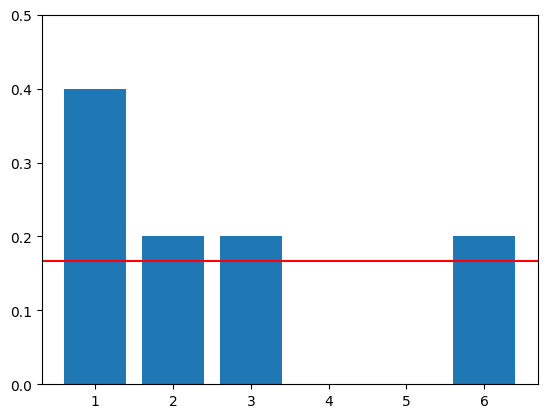

In [9]:
def simular_dado(n_tiros=10):
    resultados = [1,2,3,4,5,6]
    tiros = np.random.choice(resultados, p=[1/6.]*6, size=n_tiros)
    
    # Contar cuantos resultados tenemos de cada numero
    count = []
    for i in range(len(resultados)):
        count.append(sum(tiros==i+1)/n_tiros)
    
    plt.bar(np.arange(1,7),count)
    plt.ylim(0,0.5)
    plt.axhline(y=1/6.0, color='r')
    plt.show()
    

simular_dado(5)


In [ ]:
@widgets.interact(n_tiros=(10,100_000,1000), continuous_update=False)
def simular_dado(n_tiros=10):
    resultados = [1,2,3,4,5,6]
    tiros = np.random.choice(resultados, p=[1/6.]*6, size=n_tiros)
    
    # Contar cuantos resultados tenemos de cada numero
    count = []
    for i in range(len(resultados)):
        count.append(sum(tiros==i+1)/n_tiros)
    
    plt.bar(np.arange(1,7),count)
    plt.ylim(0,0.5)
    plt.axhline(y=1/6.0, color='r')
    plt.show()

interactive(children=(IntSlider(value=10, description='n_tiros', max=100000, min=10, step=1000), Output()), _d…

El siguiente ejercicio trata de lanzar un dardo 

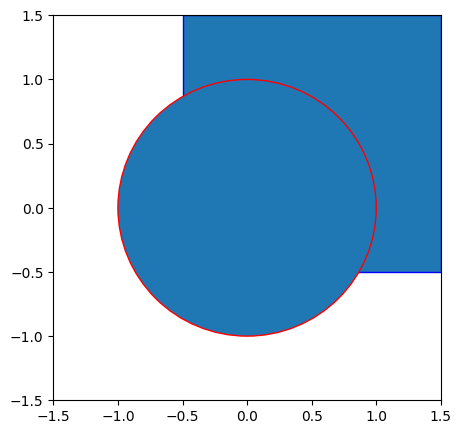

In [19]:
# Probabilidad de lanzar un dardo
plt.figure(figsize=(5,5))
plt.axes()
rectangle = plt.Rectangle((-0.5, -0.5), 2, 2, ec='blue')
circle = plt.Circle((0,0),1,ec='red')
plt.gca().add_patch(rectangle)
plt.gca().add_patch(circle)
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)

plt.show()

### Probabilidad condicional ###
La probabilidad condicional generalmente se utiliza para examinar eventos en subconjuntos del espacio muestral. Específicamente, estamos interesados en la probabilidad de que un evento ocurra solo si otro evento ha ocurrido primero. Por ejemplo: la probabilidad de que una institución financiera quiebre dado que otra institución financiera ha quebrado.  
$ P(A|B)=\frac{P(A\cap B)}{P(B)} $  

*Ejemplo:* Fallos de SIFIs (Systemically Important Financial Institutions)  
Supongamos que la probabilidad de que falle por lo menos una institución financiera en un año cualquiera es del 1%.  
Supongamos que si quiebra una institución financiera entonces hay un 20% de probabilidad de que el numero de instituciones que fallen sea exactamente 1, 2, 3, 4 o 5.  

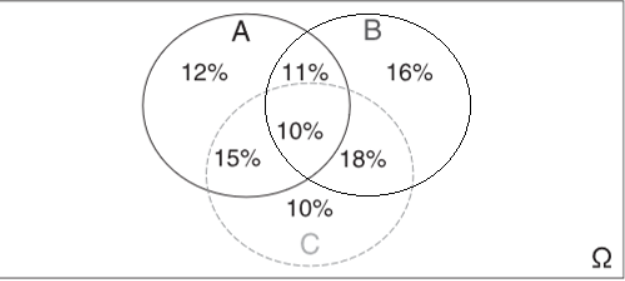

Dada la imagen anterior, calcula:  
1. $ P(A) =  $
1. $ P(A|B) = $
1. $ P(B|A) =  $
1. $ P(A\cap B\cap C) = $ 
1. $ P(B|A\cap C) =  $ 
1. $ P(A\cap B|C) =  $ 
1. $ P(A\cup B|C) =  $ 
1. ¿Alguno de estos pares de eventos es independiente?

In [20]:
#1

.12 + .11 + .10 + .15

0.48

In [ ]:
#2

()

Ejercicio
Si es un volado que un administrador de un portafolio tenga mejores rendimientos anuales que su benchmark, y los rendimientos anuales son independientes, ¿cuál es la probabilidad de que un administrador de un portafolio obtenga mejores rendimientos que el benchmark 10 años seguidos?

In [1]:
0.50 ** 10

0.0009765625

### Variables Aleatorias ###  
Es una función que asigna un número a los eventos de un espacio muestral.  
*Discretas*: Solo pueden tomar ciertos valores discretos.  
*Continuas*: Pueden tomar cualquier valor, generalmente hablando, dentro de cierto intevalo  

Ejemplos: precio de un asset, retornos, tasas de interés, P&L de un portafolio, etc...


Se utilizan principalmente dos funciones para describir las propiedades de la distribución de una variable aleatoria.  
**Distribuciones de probabilidad**  
$X_k$ discreta (PMF): $\sum_k P(X_k)=1$  
$X$ continua (PDF): $\int_{-\infty}^{\infty}P(X)dX=1$

**Función de distribución acumulada**  
La función de distribución acumulada, o CDF por sus siglas en inglés, nos da la probabilidad de que X es igual o menor que un valor dado.  
$ F(x)=P(X<x)=\int_{-\infty}^x P(x)dx $  

$ p(x) = \frac{dF(x)}{dx} $  

$ P(a < X < b) = F(b) - F(a) $  

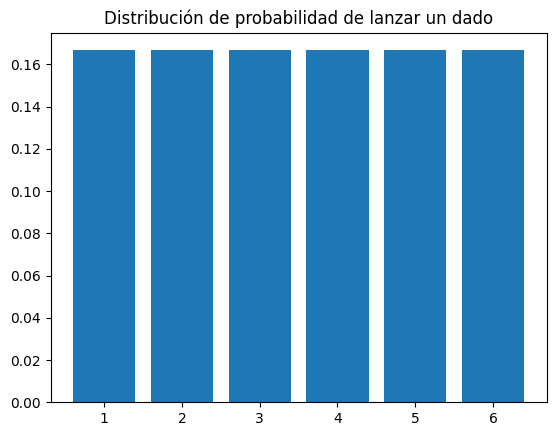

In [4]:
x = [1,2,3,4,5,6]
p = [1/6.00]*6


plt.bar(x,p)
plt.title('Distribución de probabilidad de lanzar un dado')
plt.show()

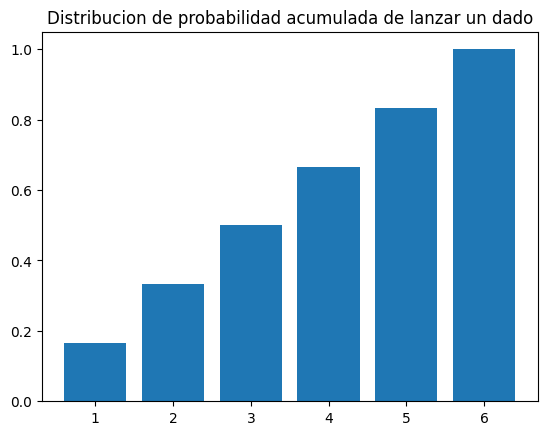

In [5]:
p_acumulada = np.cumsum(p)
plt.bar(x, p_acumulada)
plt.title('Distribucion de probabilidad acumulada de lanzar un dado')
plt.show()

### Distribuciones de variables aleatorias discretas ###
**Bernoulli**  
- Parámetros: $ p $
- Soporte: $ {0,1} $ 
- PMF: $ P(X=x)=
\begin{cases}
p & si\;x=1\\
1-p & si\;x=0
\end{cases} $

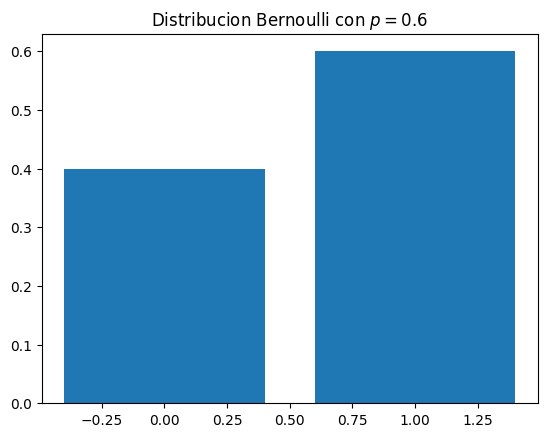

In [6]:
p = 0.6
dist_bernoulli = stats.bernoulli(p)

x = [0,1]
plt.bar(x, dist_bernoulli.pmf(x))
plt.title(f'Distribucion Bernoulli con $p={p}$')
plt.show()

**Binomial**  
- Parámetros: $ n, p $
- Soporte: $ {0,1,...,n} $ 
- PMF: $ P(X=x)={n\choose x}p^x (1-p)^{n-x} $  
$ {n\choose x} = \frac{n!}{x!(n-x)!} $

**Ejercicio Value at Risk (VaR)**  
El análisis de riesgo de una cartera de instrumentos tiene dos usos primordiales:
- Cuantificar el impacto que la variabilidad de esos factores de riesgo puede tener en el valor de la cartera.
- Analizar los flujos de la cartera, en el caso en el que ésta tenga como función suministrar flujos en fechas futuras para cubrir pasivos (financieros, actuariales).  


Los factores de riesgo que determinan las variaciones en el valor o en los
flujos de la cartera pueden ser de distintos tipos como:
- equity (precios de acciones, cotizaciones de índices, etc.); 
- tasas (curva cupón cero, factores de descuento, etc.); 
- crédito (ratings, spreads de crédito, etc.). 
- otras variables macroeconómicas que a su vez muevan factores anteriores: los tasas (por ejemplo, por control de inflación), el crédito (ciclo de crédito) o la propia bolsa (ciclo económico).  

A los factores anteriores nos referiremos como de **factores de riesgo**  

Por **riesgo de mercado** se entiende el riesgo de incurrir en pérdidas 
por el mantenimiento de posiciones en los mercados; 
como consecuencia de un movimiento adverso de factores de riesgo

Por otro lado, hablamos de **riesgo de crédito** cuando analizamos riesgos de contrapartida, realizamos análisis de capital económico, etc.  

![image-4.png](attachment:image-4.png)

La medida de riesgo más usual es el Valor en Riesgo, **VaR**, iniciales de Value at Risk. El Var viene asociado a un horizonte temporal y un nivel de confianza
El VaRα es simplemente el percentil asociado al nivel de confianza 1 − α:  
![image-6.png](attachment:image-6.png)
es decir, hay confianza de $ \alpha $ de que la caída de valor no llegue a superar el nivel $ Var_\alpha $

**Ejercicio**  
1. Calcula el VaR (1d) **individual** con alpha=95% suponiendo una distribución normal de los retornos diarios de Microsoft, Cemex, y Bitcoin. 

In [7]:
import yfinance as yf

In [9]:
data = yf.download(tickers=['MSFT', 'CX', 'BTC-USD'], period='2y')
data

[*********************100%***********************]  3 of 3 completed


Price              Close                                 High             \
Ticker           BTC-USD         CX        MSFT       BTC-USD         CX   
Date                                                                       
2024-01-08  46970.503906        NaN         NaN  47218.000000        NaN   
2024-01-09  46139.730469   7.667997  370.269348  47893.699219   7.726982   
2024-01-10  46627.777344   7.736813  377.146759  47647.222656   7.746644   
2024-01-11  46368.585938   7.697489  378.979492  48969.371094   7.756474   
2024-01-12  42853.167969   7.717152  382.763031  46498.136719   7.776136   
...                  ...        ...         ...           ...        ...   
2026-01-05  93882.554688  11.840000  472.850006  94762.070312  11.960000   
2026-01-06  93729.031250  11.920000  478.510010  94395.296875  12.030000   
2026-01-07  91308.054688  11.530000  483.470001  93738.789062  11.920000   
2026-01-08           NaN  12.270000  478.109985           NaN  12.280000   
2026-01-09  91200.437500        NaN         NaN  91440.554688        NaN   

Price                            Low                                 Open  \
Ticker            MSFT       BTC-USD         CX        MSFT       BTC-USD   
Date                                                                        
2024-01-08         NaN  43244.082031        NaN         NaN  43948.707031   
2024-01-09  370.466392  45244.714844   7.589351  365.736920  46987.640625   
2024-01-10  378.526216  44483.152344   7.550028  370.791533  46121.539062   
2024-01-11  384.940601  45678.644531   7.618843  374.791928  46656.074219   
2024-01-12  382.969937  41903.769531   7.628675  378.999143  46354.792969   
...                ...           ...        ...         ...           ...   
2026-01-05  476.070007  91414.625000  11.580000  469.500000  91414.625000   
2026-01-06  478.739990  91286.546875  11.870000  469.750000  93876.945312   
2026-01-07  489.700012  90601.804688  11.510000  477.950012  93727.468750   
2026-01-08  482.660004           NaN  11.550000  475.859985           NaN   
2026-01-09         NaN  89344.953125        NaN         NaN  91280.703125   

Price                                    Volume                         
Ticker             CX        MSFT       BTC-USD         CX        MSFT  
Date                                                                    
2024-01-08        NaN         NaN  4.274619e+10        NaN         NaN  
2024-01-09   7.589351  366.544881  3.982129e+10  4427700.0  20830000.0  
2024-01-10   7.628675  370.840787  5.011461e+10  5334900.0  25514200.0  
2024-01-11   7.726982  380.329361  4.583373e+10  4240400.0  27850800.0  
2024-01-12   7.667998  379.826799  4.333270e+10  4276100.0  21661200.0  
...               ...         ...           ...        ...         ...  
2026-01-05  11.580000  474.059998  5.337641e+10  5211400.0  25250300.0  
2026-01-06  11.940000  473.799988  5.243061e+10  6154200.0  23037700.0  
2026-01-07  11.900000  479.760010  4.346130e+10  4785700.0  25564200.0  
2026-01-08  11.550000  480.578003           NaN  8011901.0  18098810.0  
2026-01-09        NaN         NaN  4.389907e+10        NaN         NaN  

[733 rows x 15 columns]

In [10]:
data['Close']

Ticker,BTC-USD,CX,MSFT
Date,,,
2024-01-08,46970.503906,NaN,NaN
2024-01-09,46139.730469,7.667997,370.269348
2024-01-10,46627.777344,7.736813,377.146759
2024-01-11,46368.585938,7.697489,378.979492
2024-01-12,42853.167969,7.717152,382.763031
...,...,...,...
2026-01-05,93882.554688,11.840000,472.850006
2026-01-06,93729.031250,11.920000,478.510010
2026-01-07,91308.054688,11.530000,483.470001


In [13]:
# Calculamos los rendimientos de cada activo
rendimientos = data['Close'].pct_change()
rendimientos

C:\Users\braya\AppData\Local\Temp\ipykernel_23416\1706093827.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rendimientos = data['Close'].pct_change()


Ticker,BTC-USD,CX,MSFT
Date,,,
2024-01-08,NaN,NaN,NaN
2024-01-09,-0.017687,NaN,NaN
2024-01-10,0.010578,0.008974,0.018574
2024-01-11,-0.005559,-0.005083,0.004859
2024-01-12,-0.075815,0.002554,0.009983
...,...,...,...
2026-01-05,0.027010,0.023336,-0.000190
2026-01-06,-0.001635,0.006757,0.011970
2026-01-07,-0.025830,-0.032718,0.010365


In [14]:
rendimientos.mean()

Ticker
BTC-USD    0.001216
CX         0.000820
MSFT       0.000417
dtype: float64

In [15]:
rendimientos.var()

Ticker
BTC-USD    0.000622
CX         0.000356
MSFT       0.000134
dtype: float64

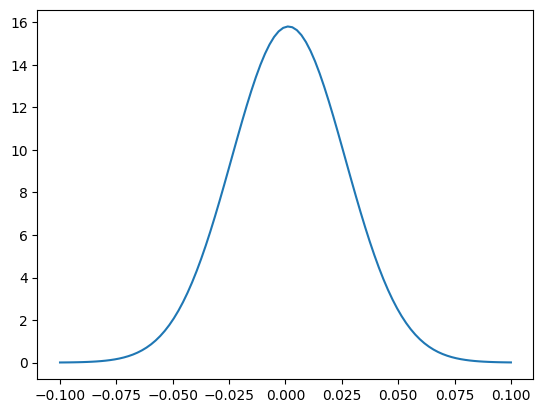

In [16]:
# Bitcoin
x = np.linspace(-0.1, 0.1, 100)
f_x = stats.norm(loc=0.001307, scale=np.sqrt(0.000637)).pdf(x)

plt.plot(x, f_x)
plt.show()